In [1]:
import pandas as pd 
import seaborn as sns 

In [2]:
data = pd.read_csv ('Titanic-Dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### check null values 

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data_numeric= data.select_dtypes(exclude =['object'])
data_object = data.select_dtypes (include = ['object'])

In [8]:
data_numeric = data_numeric.fillna(data_numeric.mean())

In [9]:
data_object = data_object.fillna(data_object.mode().iloc[0])

In [10]:
data = pd.concat([data_numeric , data_object], axis = 1)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

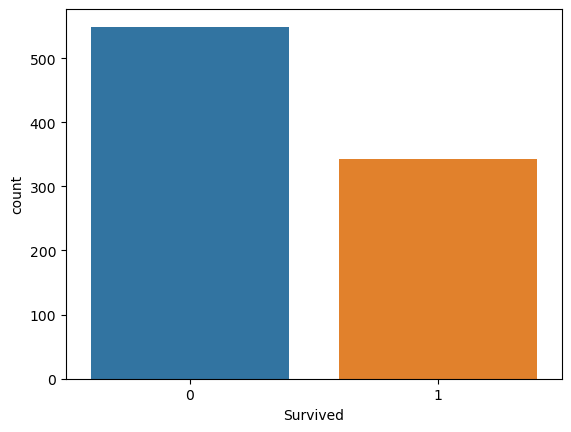

In [12]:
sns.countplot (x = 'Survived' , data= data )

<Axes: xlabel='Pclass', ylabel='count'>

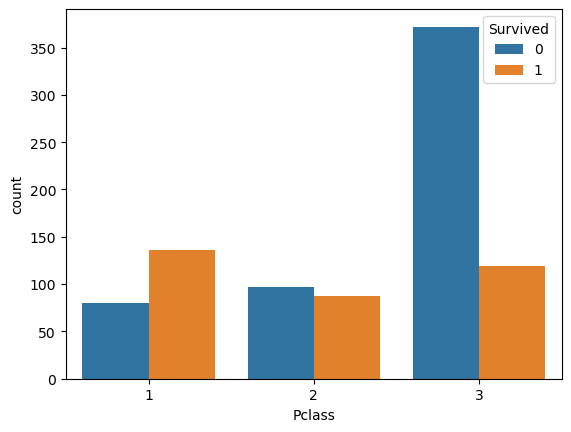

In [13]:
sns.countplot (x='Pclass',hue ='Survived', data= data )

<Axes: xlabel='Survived', ylabel='count'>

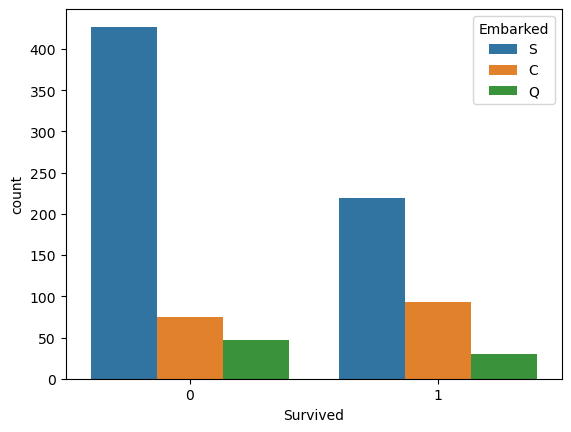

In [14]:
sns.countplot(x='Survived', hue='Embarked', data=data)

<Axes: xlabel='Age', ylabel='Count'>

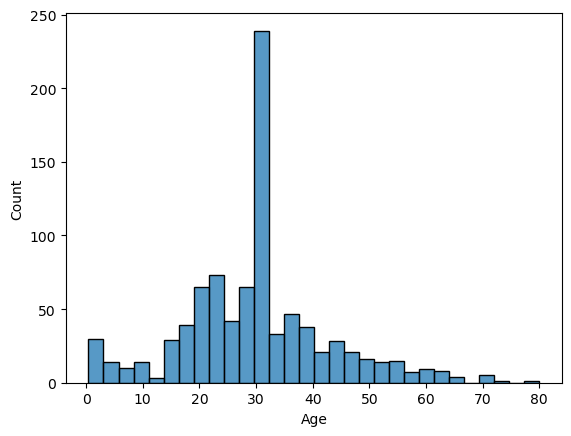

In [15]:
sns.histplot(x='Age' , data = data)

<Axes: xlabel='Age', ylabel='Count'>

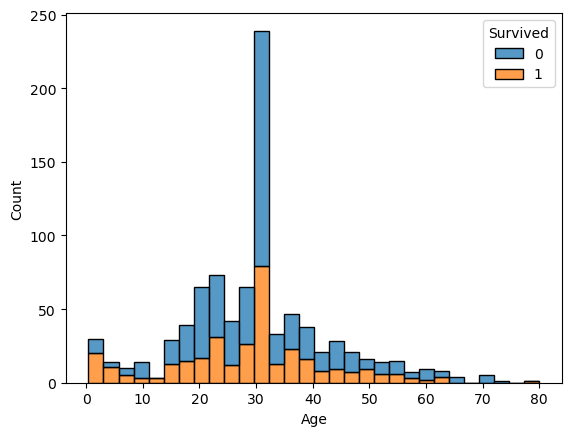

In [16]:
sns.histplot(x='Age' , data = data , hue = 'Survived' , multiple = 'stack')

<Axes: xlabel='Sex', ylabel='Count'>

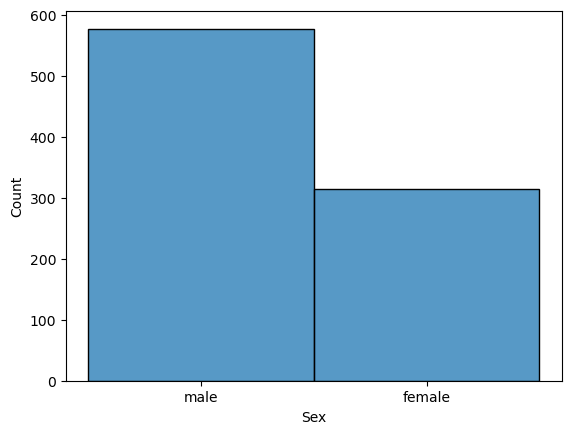

In [17]:
sns.histplot(x='Sex' , data = data)

<Axes: xlabel='Sex', ylabel='Count'>

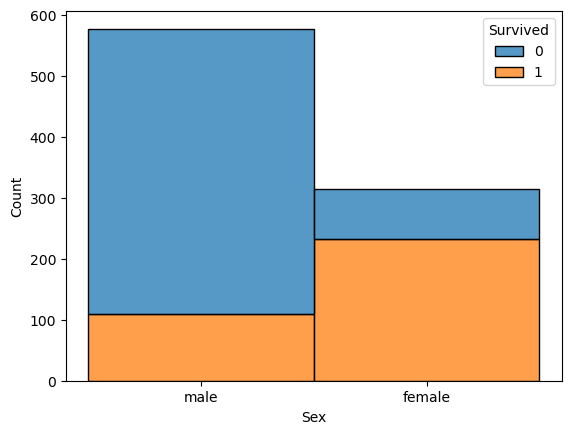

In [18]:
sns.histplot(hue='Survived' , x = 'Sex' , data = data , multiple = 'stack')

<Axes: xlabel='Fare', ylabel='Count'>

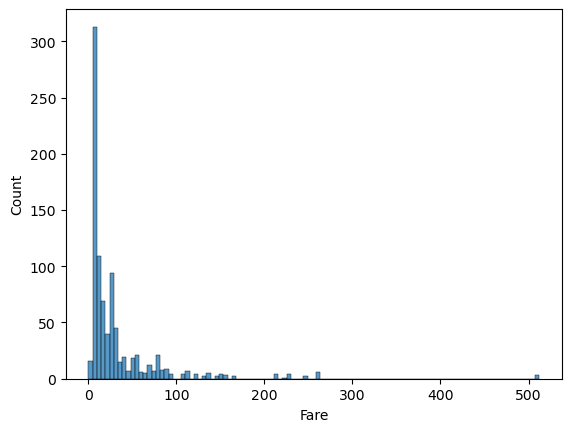

In [19]:
sns.histplot(x='Fare', data=data)

<Axes: xlabel='Fare', ylabel='Survived'>

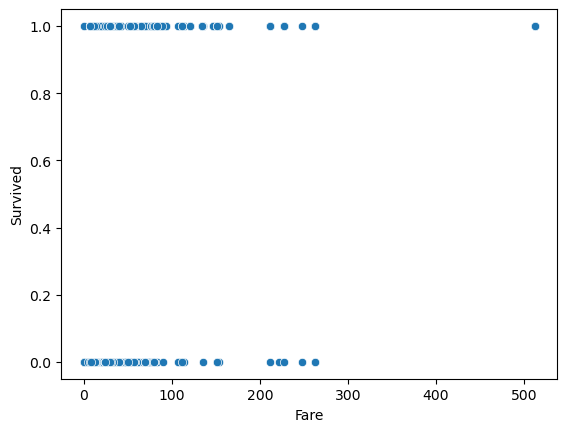

In [20]:
sns.scatterplot(x='Fare', y='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

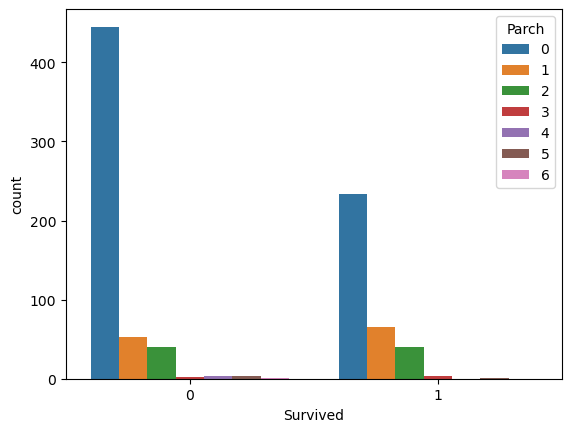

In [21]:
sns.countplot(x='Survived', hue='Parch', data=data)

<Axes: xlabel='Survived', ylabel='count'>

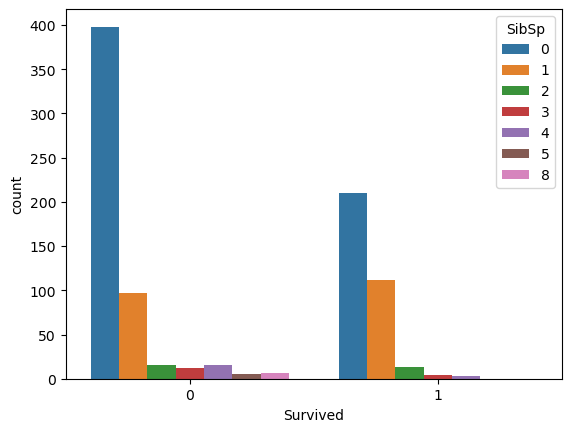

In [22]:
sns.countplot(x='Survived', hue='SibSp', data=data)

<Axes: xlabel='Name Length', ylabel='Count'>

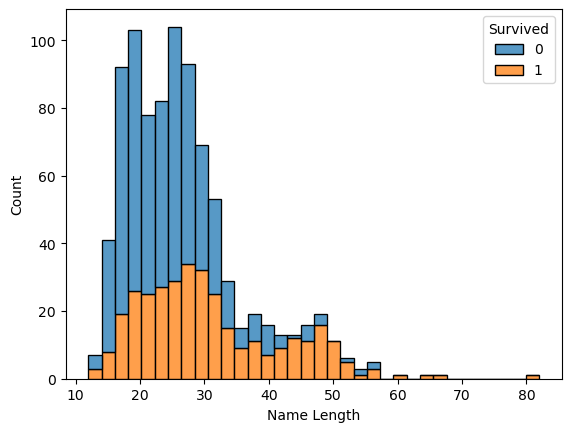

In [23]:
data['Name Length'] = data['Name'].apply(len)
sns.histplot(x='Name Length', data=data, hue='Survived', multiple='stack')

In [24]:
print(data.groupby('Sex')['Age'].median())

Sex
female    29.699118
male      29.699118
Name: Age, dtype: float64


In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [26]:
data = pd.get_dummies(data , columns = ['Sex', 'Embarked'])

In [27]:
data= data.drop (['PassengerId', 'Name' , 'Ticket' , 'Cabin'], axis =1 )

In [28]:
X = data.drop('Survived' , axis =1 )
y = data['Survived'] 

In [29]:
X

,Pclass,Age,SibSp,Parch,Fare,Name Length,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,23,0,1,0,0,1
1,1,38.000000,1,0,71.2833,51,1,0,1,0,0
2,3,26.000000,0,0,7.9250,22,1,0,0,0,1
3,1,35.000000,1,0,53.1000,44,1,0,0,0,1
4,3,35.000000,0,0,8.0500,24,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,21,0,1,0,0,1
887,1,19.000000,0,0,30.0000,28,1,0,0,0,1
888,3,29.699118,1,2,23.4500,40,1,0,0,0,1
889,1,26.000000,0,0,30.0000,21,0,1,1,0,0


In [30]:
x_train , x_test , y_train , y_test = train_test_split (X , y  , test_size = 0.3 , random_state = 42)

In [31]:
rf = RandomForestClassifier ()

In [32]:
rf.fit (x_train , y_train )

RandomForestClassifier()

In [33]:
y_pred = rf.predict(x_test)

In [34]:
accuracy = accuracy_score (y_test, y_pred)
accuracy*100

80.97014925373134